# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
# a base de dados já não estava mais disponível no site como antes, então fiz o download e importei a  seguinte
url = './processed.cleveland.data'

# criando a df com as variáveis escolhias
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

# criando variável flag de 'num' 0= saudável e 1 = doente

df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo 
  - 1 = male; 
  - 0 = female  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 
  - 3: normal; 
  - 6 = defeito corrigido; 
  - 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,flag_doente
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,1.000000


In [4]:
# não há dados nulos
df.isnull().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
num            0
flag_doente    0
dtype: int64

In [5]:
# não há entradas duplicadas
df.duplicated().sum()

0

In [6]:
df.info()
#verificando tipagem dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


> Variável ``flag_doente``: 0= saudável e 1 = doente

### 1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

> "Quando o evento é raro, o risco (ou probabilidade) do evento se aproximam numericamente do odds."

In [7]:
# criando a função que retorna um crosstab para análise bivariada
def biv (data, x:str,y:str) -> 'DataFrame':
    x = data[x]
    y = data[y]
    tab = pd.crosstab(x,y, margins = True)
    #adição de variáveis com parâmetros
    tab['probabilidade'] = tab[1]/tab['All']
    tab['chance'] = tab[1]/tab[0]
    tab[f'RC_vs_{x.name}_1'] = tab['chance']/tab.loc[1,'chance']
    tab['log_chance'] = np.log(tab['chance'])
    tab[f'log_RC_vs_{x.name}_1'] = np.log(tab[f'RC_vs_{x.name}_1'])
    return tab

In [8]:
df.columns # pra coletar o nome das colunas exatamente como escrito

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'flag_doente'],
      dtype='object')

In [9]:
# slope: Depressão de ST induzida por exercício em relação ao repouso
#   1: inclinação ascendente
#   2: estável
#   3: inclinação descendente
biv(df,'slope','flag_doente')

flag_doente,0,1,All,probabilidade,chance,RC_vs_slope_1,log_chance,log_RC_vs_slope_1
slope,,,,,,,,
1.0,106,36,142,0.253521,0.339623,1.000000,-1.079920,0.000000
2.0,49,91,140,0.650000,1.857143,5.468254,0.619039,1.698959
3.0,9,12,21,0.571429,1.333333,3.925926,0.287682,1.367602
All,164,139,303,0.458746,0.847561,2.495596,-0.165392,0.914528


In [10]:
# cp: tipo de dor no peito
#   1: angina típica
#   2: angina atípica
#   3: dor não-angina
#   4: assintomático
biv(df,'cp','flag_doente')

flag_doente,0,1,All,probabilidade,chance,RC_vs_cp_1,log_chance,log_RC_vs_cp_1
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,1.000000,-0.826679,0.000000
2.0,41,9,50,0.180000,0.219512,0.501742,-1.516347,-0.689669
3.0,68,18,86,0.209302,0.264706,0.605042,-1.329136,-0.502457
4.0,39,105,144,0.729167,2.692308,6.153846,0.990399,1.817077
All,164,139,303,0.458746,0.847561,1.937282,-0.165392,0.661286


In [11]:
# restecg: resultados eletrocardiográficos em repouso
#   0: normal
#   1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
#   2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
biv(df,'restecg','flag_doente')

flag_doente,0,1,All,probabilidade,chance,RC_vs_restecg_1,log_chance,log_RC_vs_restecg_1
restecg,,,,,,,,
0.0,95,56,151,0.370861,0.589474,0.196491,-0.528525,-1.627137
1.0,1,3,4,0.750000,3.000000,1.000000,1.098612,0.000000
2.0,68,80,148,0.540541,1.176471,0.392157,0.162519,-0.936093
All,164,139,303,0.458746,0.847561,0.282520,-0.165392,-1.264005


#### Qual delas parece discriminar mais o risco?
A variável ``restecg`` parece descriminar um risco melhor 

### 2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [12]:
# criando a função para quantitativas contínuas
def biv_conti (data, x:str,y:str) -> 'DataFrame':
    # criando as categorias com pd.qcut
    vdf = data.copy() # copiar a df
    vdf[x] = pd.qcut(vdf[x], q = 5)
    #definir x e y
    index = str(vdf[x].sort_values().unique()[0]) # string que dá o nome da coluna da RC
    x = vdf[x]
    y = vdf[y]
    #criando crosstab
    tab = pd.crosstab(x,y, margins = True)
    #adição de variáveis com parâmetros
    tab['probabilidade'] = tab[1]/tab['All']
    tab['chance'] = tab[1]/tab[0]
    tab[f'RC_vs_{x.name}_{index}'] = tab['chance']/tab.iloc[0,4]
    tab['log_chance'] = np.log(tab['chance'])
    tab[f'log_RC_vs_{x.name}_{index}'] = np.log(tab[f'RC_vs_{x.name}_{index}'])
    return tab

In [13]:
biv_conti(df,'age','flag_doente')

flag_doente,0,1,All,probabilidade,chance,"RC_vs_age_(28.999, 45.0]",log_chance,"log_RC_vs_age_(28.999, 45.0]"
age,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,1.000000,-1.077559,0.000000
"(45.0, 53.0]",42,22,64,0.343750,0.523810,1.538690,-0.646627,0.430932
"(53.0, 58.0]",32,39,71,0.549296,1.218750,3.580078,0.197826,1.275385
"(58.0, 62.0]",13,32,45,0.711111,2.461538,7.230769,0.900787,1.978345
"(62.0, 77.0]",30,30,60,0.500000,1.000000,2.937500,0.000000,1.077559
All,164,139,303,0.458746,0.847561,2.489710,-0.165392,0.912166


In [53]:
biv_conti(df,'trestbps','flag_doente')

flag_doente,0,1,All,probabilidade,chance,"RC_vs_trestbps_(93.999, 120.0]",log_chance,"log_RC_vs_trestbps_(93.999, 120.0]"
trestbps,,,,,,,,
"(93.999, 120.0]",60,37,97,0.381443,0.616667,1.000000,-0.483427,0.000000
"(120.0, 126.0]",10,15,25,0.600000,1.500000,2.432432,0.405465,0.888892
"(126.0, 134.0]",35,27,62,0.435484,0.771429,1.250965,-0.259511,0.223915
"(134.0, 144.6]",34,24,58,0.413793,0.705882,1.144674,-0.348307,0.135120
"(144.6, 200.0]",25,36,61,0.590164,1.440000,2.335135,0.364643,0.848070
All,164,139,303,0.458746,0.847561,1.374423,-0.165392,0.318034


#### 3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [46]:
# Transformei a variável cp em dummie dado que ela é categórica com mais de duas classificações
reglog = smf.logit(" flag_doente ~ sex + C(cp) + trestbps + age"
                   , data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.3097
Time:                        15:33:57   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.3407      1.621     -5.145      0.000     -11.518      -5.163
C(cp)[T.2.0]    -0.0617      0.636     -0.097      0.923      -1.309       1.186
C(cp)[T.3.0]     0.0715      0.573      0.125      0.901      -1.051       1.194
C(cp)[T.4.0]     2.4789      0.553      4.485      0.000       1.396       3.562
sex              1.8094      0.353      5.130      0.000       1.118       2.501
trestbps         0.0193      0.009      2.261      0.024       0.003       0.036
age              0.0567      0.018      3.120      0.002       0.021       0.092
================================================================================
"""

- Todas as variáveis parecem ser relevantes para explicar flag_doente dado aos P values inferiores a 5%
- Após a categorização da variável ```cp``` os níveis T.2.0 e T.3.0 parecem não fazer tanto sentido nesse conjunto dado ao P value.
  - T.2.0 e T.3.0 são dor atípica e dor não angina respectivamente, o que, logicamente não indicaria doença cardio. por isso sua irrelevancia para o modelo.
- A dor no peito quando assintomática que é o nível T.4.0 obviamente indicaria uma maior probabilidade de doença imperceptível.
- A variável ```sex``` parece indicar que homens tendem a ficar menos doente do coração que mulheres, dado o valor positivo de beta.
- ```trestbps``` e ```age``` são variáveis significantes no conjunto de variáveis da atual regressão.
- Para ```trestbps``` quanto mais alta a pressão sanguínea maior a chance de doença cardio.
- Para ```age``` quanto mais idoso o paciente mior a chance de doença.

In [47]:
# calculando o eta para 2 pacientes de sexos diferentes só pra treinar mesmo
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1


In [22]:
df[df['sex'] != 1.0].head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3,1


In [40]:
# eta para primeiro paciente homem
eta = (-11.1167) + (1.8021*1) + (1.1403*1) + (0.0214*145.0) + (0.0582*63.0)
eta

-1.4047000000000005

In [41]:
chance = np.exp(eta)
chance

0.24544067761248387

In [42]:
p = 1/(1 + np.exp(-eta))
p

0.19707135155003522

In [43]:
# eta para primeira paciente mulher
eta = (-11.1167) + (1.8021*0) + (1.1403*2) + (0.0214*130.0) + (0.0582*41)
eta

-3.6679

In [44]:
np.exp(eta)

0.025530026748528865

In [45]:
p = 1/(1 + np.exp(-eta))
p

0.024894470256977767

#### 4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [54]:
# calculo do valor predito
df['predito'] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.944123
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.886566
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.134929
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.027278


In [56]:
# calibragem com 5 grupos
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

(0.0131, 0.143]    62
(0.143, 0.287]     59
(0.287, 0.586]     62
(0.586, 0.822]     59
(0.822, 0.944]     61
Name: predito, dtype: int64

In [57]:
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

,contagem
predito,
"(0.0131, 0.143]",62
"(0.143, 0.287]",59
"(0.287, 0.586]",62
"(0.586, 0.822]",59
"(0.822, 0.944]",61


In [58]:
# add media do valor predito
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.0131, 0.143]",62,0.072008
"(0.143, 0.287]",59,0.209626
"(0.287, 0.586]",62,0.435175
"(0.586, 0.822]",59,0.708861
"(0.822, 0.944]",61,0.874819


In [65]:
# add porcentagem de doentes observados
qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doente
predito,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


Text(0.5, 0, 'Grupo')

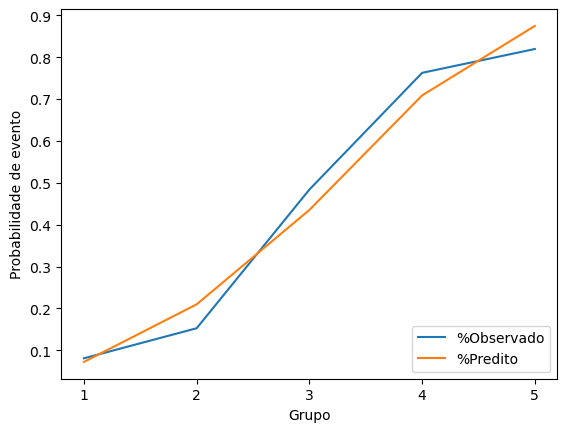

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doente'].plot(label='%Observado')
ax = qualid['predito'].plot(label='%Predito')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

#### 5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

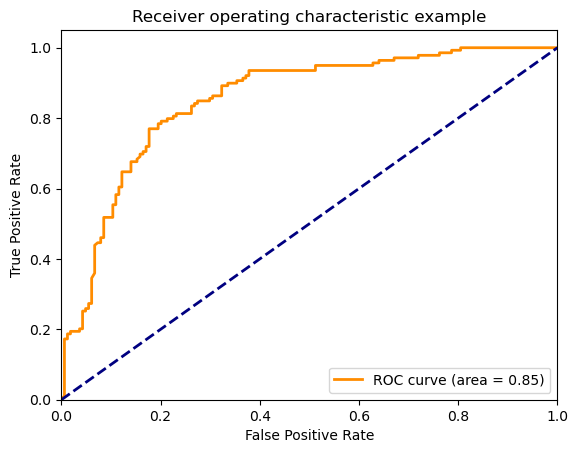

In [70]:
# calculo curva roc
from sklearn.metrics import roc_curve
from sklearn import metrics
from scipy.stats import ks_2samp

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Função Distribuição Acumulada')

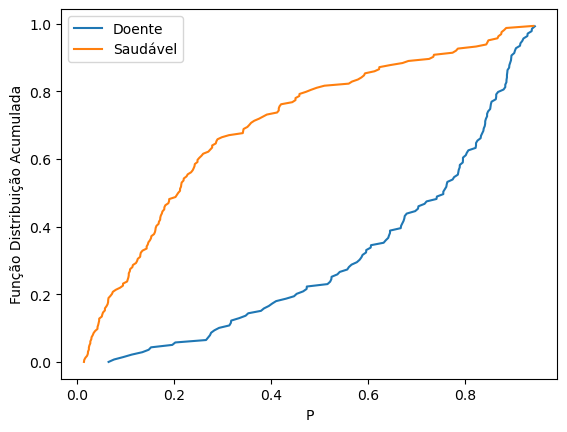

In [71]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doente')

score_pop2 = df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Saudável')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')

In [69]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.54%
KS: 59.30% 
AUC: 85.19% 
GINI: 70.39%


- O modelo para estar bom. A acurácia está alta.
- A curva roc (AUC) aponta para um alto valor que é aocmpanhado de um GINI também elevado.
- O KS parece indicar uma boa capacidade de classificação e predição do modelo.

### 6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [73]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.944123


In [77]:
# até então não havia missing values ou duplicadas na tabela.
# mas encontrei duas linhas com o valor ? para a variável thal.
df.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [78]:
# que estranho. o correto seria investigar a origem do erro. a obs parece consistente e real.
df[df['thal'] == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0,0,0.057348
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2,1,0.795848


In [87]:
# removi as linhas on thal == ?
df = df[df['thal']!= '?']
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

In [91]:
# (" flag_doente ~ sex + C(cp) + trestbps + age + C(thal) + C(restecg)"
reglog = smf.logit(" flag_doente ~ sex + C(cp) + trestbps + age + C(thal) "
                   , data=df).fit()

reglog.summary()

# adicionei C(restecg) mas o p value foi acima de 15%

Optimization terminated successfully.
         Current function value: 0.431234
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  301
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            8
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.3747
Time:                        18:04:35   Log-Likelihood:                -129.80
converged:                       True   LL-Null:                       -207.60
Covariance Type:            nonrobust   LLR p-value:                 1.334e-29
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.5522      1.678     -4.501      0.000     -10.841      -4.264
C(cp)[T.2.0]       0.0375      0.665      0.056      0.955      -1.266       1.341
C(cp)[T.3.0]      -0.0129      0.605     -0.021      0.983      -1.199       1.173
C(cp)[T.4.0]       2.1805      0.574      3.800      0.000       1.056       3.305
C(thal)[T.6.0]     0.9952      0.631      1.576      0.115      -0.242       2.233
C(thal)[T.7.0]     1.7715      0.342      5.174      0.000       1.100       2.443
sex                1.1434      0.390      2.930      0.003       0.379       1.908
trestbps           0.0136      0.009      1.522      0.128      -0.004       0.031
age                0.0533      0.019      2.801      0.005       0.016       0.091
==================================================================================
"""

In [92]:
#Calibragem

# calculo do valor predito
df['predito'] = reglog.predict(df)
df.head()

# calibragem com 5 grupos
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

# add media do valor predito
qualid['predito'] = group_reg['predito'].mean()
qualid

# add porcentagem de doentes observados
qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

C:\Users\khrik\AppData\Local\Temp\ipykernel_672\721072957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predito'] = reglog.predict(df)


,contagem,predito,pct_doente
predito,,,
"(0.013600000000000001, 0.094]",61,0.054106,0.049180
"(0.094, 0.284]",60,0.164245,0.183333
"(0.284, 0.564]",60,0.430743,0.416667
"(0.564, 0.866]",60,0.736212,0.750000
"(0.866, 0.962]",60,0.913792,0.900000


Text(0.5, 0, 'Grupo')

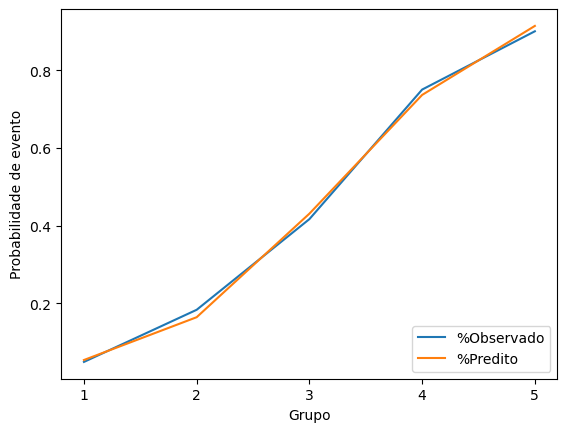

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doente'].plot(label='%Observado')
ax = qualid['predito'].plot(label='%Predito')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

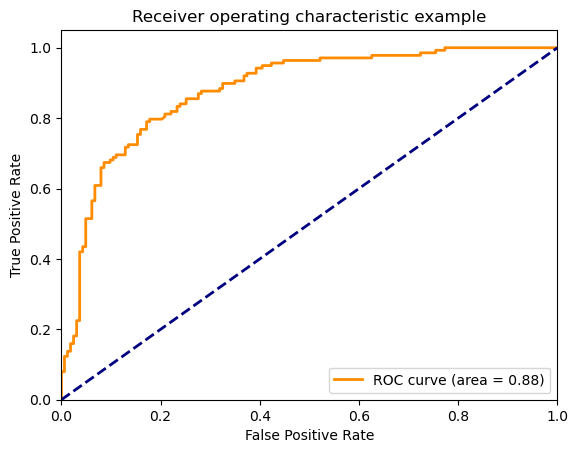

In [94]:
# Discriminação

from sklearn.metrics import roc_curve
from sklearn import metrics
from scipy.stats import ks_2samp

# calculo curva roc
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Função Distribuição Acumulada')

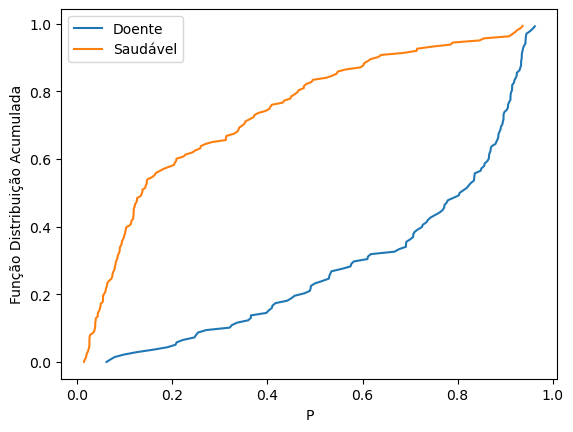

In [95]:
# curva KS
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doente')

score_pop2 = df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Saudável')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')

In [96]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 80.40%
KS: 61.92% 
AUC: 87.98% 
GINI: 75.96%


- Esta foi a melhor combinação de variáveis até então: (" flag_doente ~ sex + C(cp) + trestbps + age + C(thal) "
- Os valores dos parâmetros subiram apesar de algumas classes das variáveis não serem significantes.